<a href="https://colab.research.google.com/github/mateuszkojro/ui4-programowanie-zaawansowane/blob/master/zadanie_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries we will use

In [ ]:
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as functional
import numpy as np
import matplotlib.pyplot as plt

Lets download CIFAR100 (subset of CIFAR10)

<https://www.cs.toronto.edu/~kriz/cifar.html>

and create data loader

In [ ]:
transform = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
     ])

In [ ]:
# sourced from https://pytorch.org/vision/stable/datasets.html
cifar = torchvision.datasets.CIFAR10("./",download=True,    transform=transform,)
data_loader = torch.utils.data.DataLoader(
    cifar,
    batch_size=2,
    shuffle=True,
    num_workers=2
)


Extracting ./cifar-10-python.tar.gz to ./


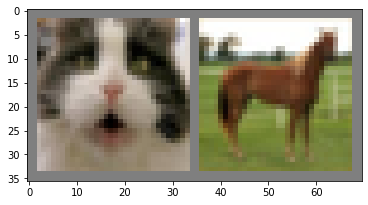

  cat horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(data_loader)
images, labels = dataiter.next()
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
  class Model(nn.Module):
    def __init__(self):
      super(Model,self).__init__()
      self.stack = nn.Sequential(
        nn.Conv2d(3, 20, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(20, 16, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(16 * 5 * 5, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
      )
    def forward(self,x):
      return self.stack(x)

In [ ]:
model = Model().to(device)
print(f"Model sent to {device}")

Model sent to cuda


In [ ]:
def train_loop(model, dataloader, loss_fn, optimizer, LOG=False):
  loss_data = []
  running_loss = 0
  for batch, data in enumerate(dataloader,0):
    inputs, label = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    prediction = model(inputs)
    loss = loss_fn(prediction, label)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if batch % 200 == 199:
      print(f"loss: {running_loss/(200)}")
      loss_data.append(running_loss/(200))
      running_loss = 0
    if batch == 20000:
      return loss_data

In [ ]:
learning_rate = 0.001
# Initialize the loss function
# loss_fn = torch.nn.L1Loss()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

data = train_loop(model=model,
           dataloader=data_loader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           LOG=False
           )
plt.plot(data)

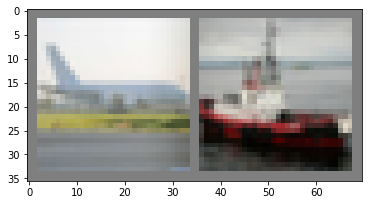

tensor([0, 8], device='cuda:0')
plane ship
tensor([0, 8])


In [ ]:
dataiter = iter(data_loader)
images, labels = dataiter.next()
inputs, label = images.to(device), labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images))
result = model(inputs)
_, predicted = torch.max(result, 1)
print(predicted)
print(classes[predicted[0]],classes[predicted[1]])
print(labels)